# **HOUSE PRICE PREDICTION**

## **LOADING DATA**

In [ ]:
#importing libraries
import pandas as pd

In [ ]:
# uploading files
from google.colab import files
uploaded = files.upload()

In [ ]:
uploaded = files.upload()

In [ ]:
# reading the csv files
train_data= pd.read_csv('train.csv')
test_data= pd.read_csv('test.csv')
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1311.365124,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,54.771845
1,Dealer,0,0,2,BHK,1275.326592,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,50.467525
2,Owner,0,0,2,BHK,954.758264,1,1,"Jigani,Bangalore",12.778033,77.632191,44.404171
3,Owner,0,1,2,BHK,935.702177,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,60.110613
4,Dealer,1,0,2,BHK,998.871424,0,1,"New Town,Kolkata",22.592200,88.484911,60.078084


## **CORELATION HEATMAP**

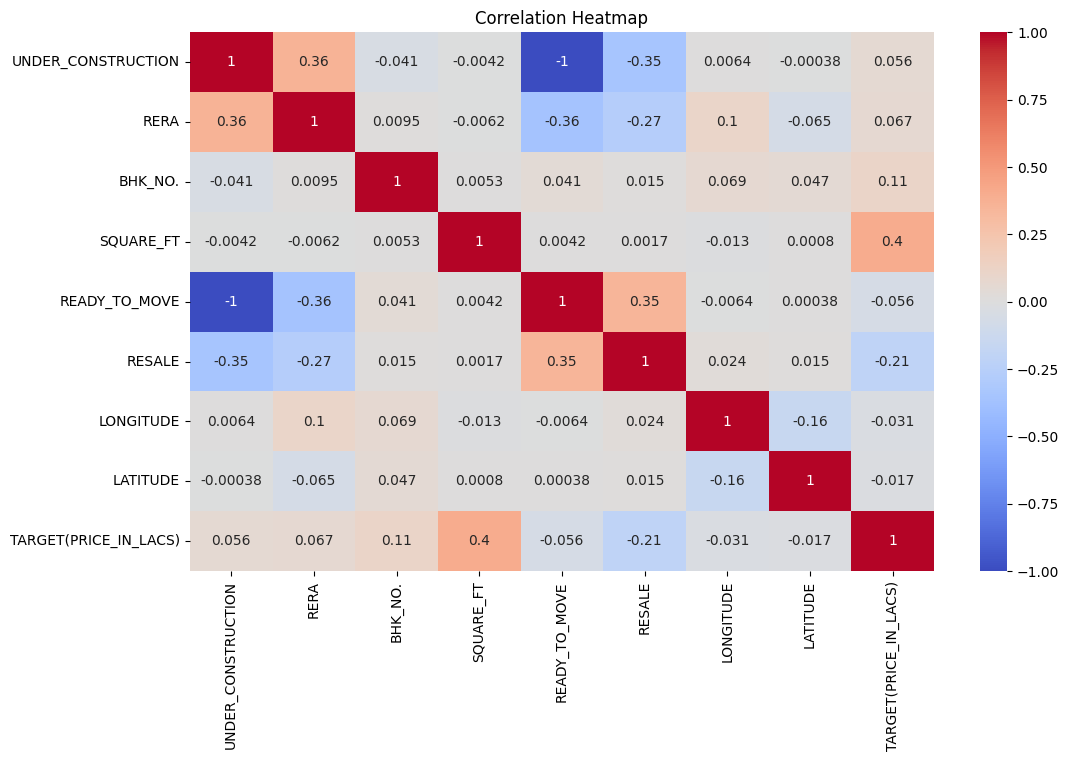

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_data = train_data.select_dtypes(include=['number'])

# Calculate correlation
cor = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## *DROPPING ADDRESS FEATURE*

In [ ]:
# dropping the Address feature
train_data.drop(['ADDRESS'],axis=1,inplace=True)
test_data.drop(['ADDRESS'],axis=1,inplace=True)

## **DATA VISUALISATION**

## *UNDER_CONSTRUCTION Vs TARGET PRICE*

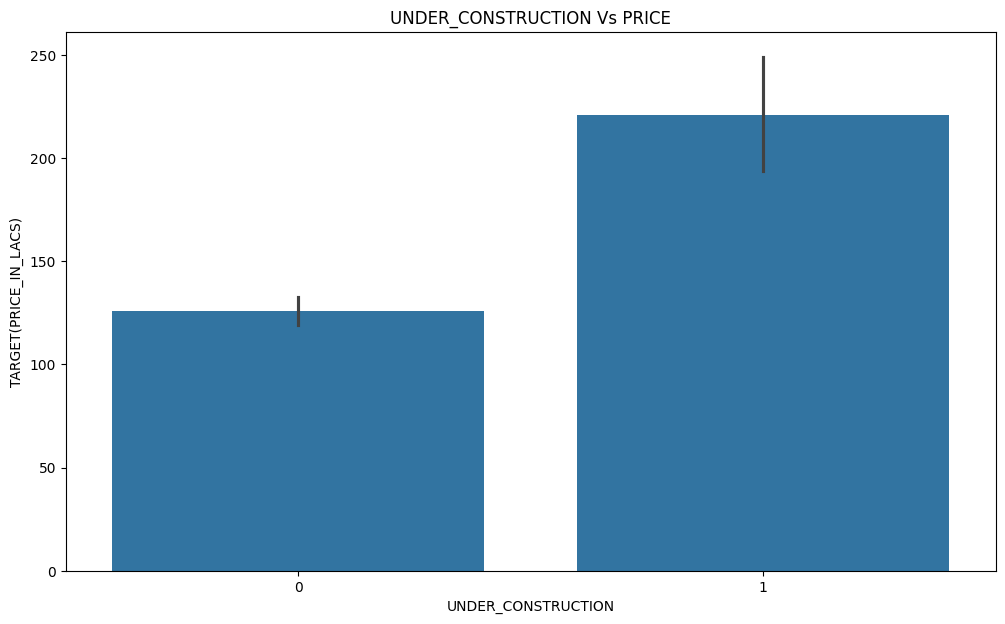

In [ ]:
# plotting under_construction vs Price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['UNDER_CONSTRUCTION'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('UNDER_CONSTRUCTION Vs PRICE')
plt.show()

## *RERA Vs TARGET PRICE*


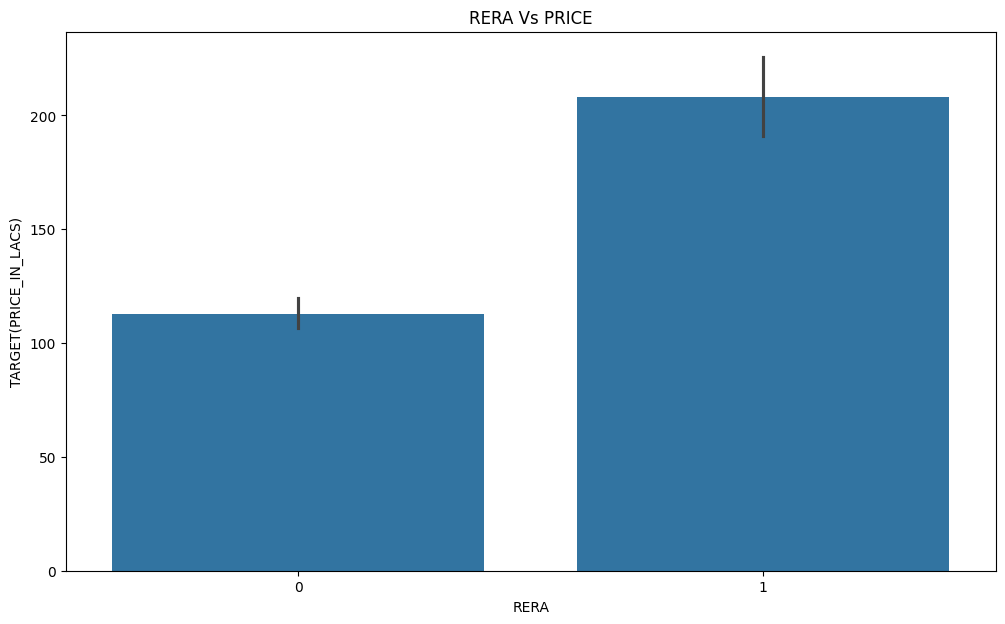

In [ ]:
# plotting RERA vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['RERA'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RERA Vs PRICE')
plt.show()

It is clear from the above barplot that the price of house with RERA approval is valued at a higher price than the house without a RERA approval.

## *RESALE Vs TARGET PRICE*

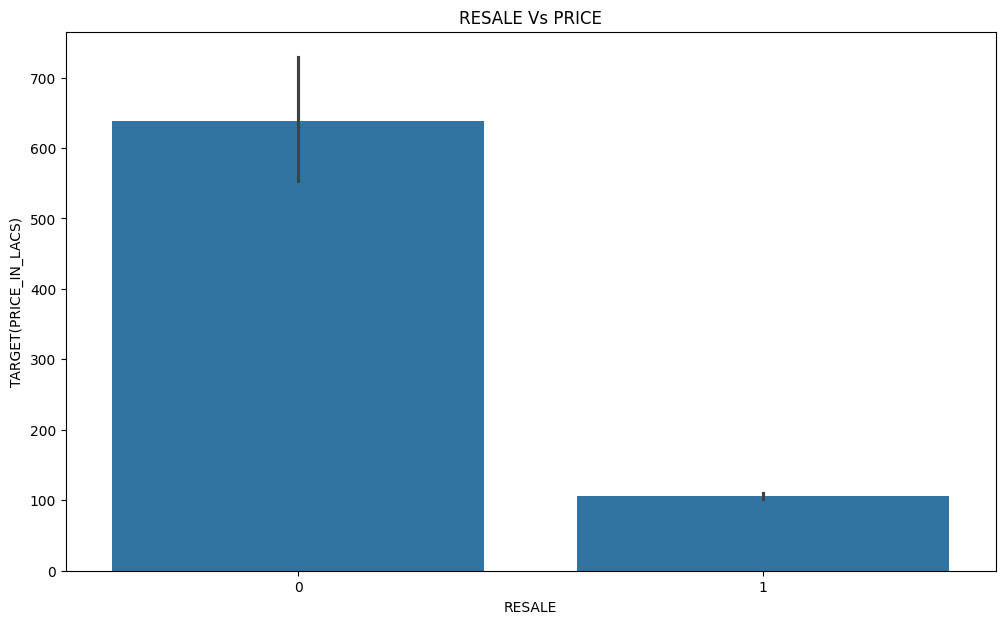

In [ ]:
# plotting resale vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['RESALE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('RESALE Vs PRICE')
plt.show()

Its clear from the above Barplot that the price of a brand new house is higher than the price of the house which is resold.

## READY TO MOVE Vs TARGET PRICE

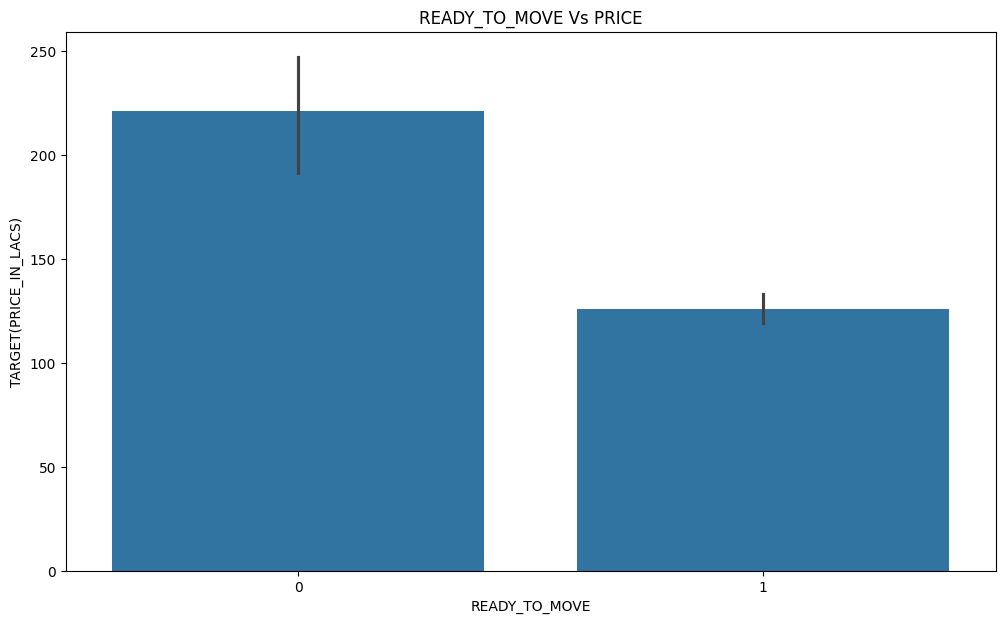

In [ ]:
# plotting ready to move vs target price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['READY_TO_MOVE'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('READY_TO_MOVE Vs PRICE')
plt.show()

The ready to occupy house sell for lesser price. Since most of the ready to move houses are second hand houses.

## *BHK_OR_RK Vs TARGET PRICE*

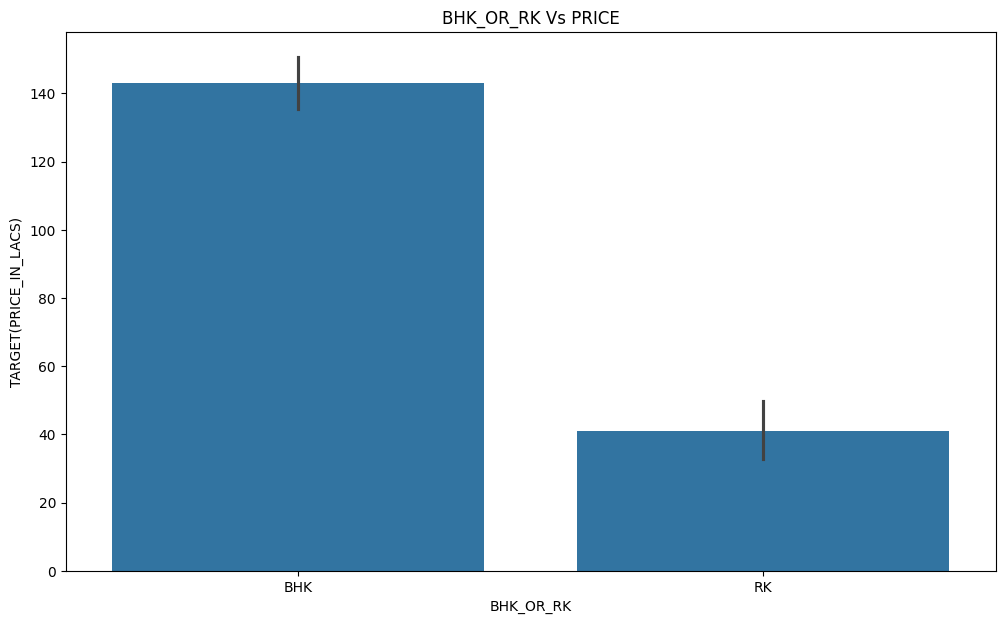

In [ ]:
# plotting BHK_OR_RK vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_OR_RK'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_OR_RK Vs PRICE')
plt.show()

The price of house with BHK(bedroom, hall, room) is costlier than a house with only RK(room, Kichen).

## *POSTED_BY Vs TARGET PRICE*

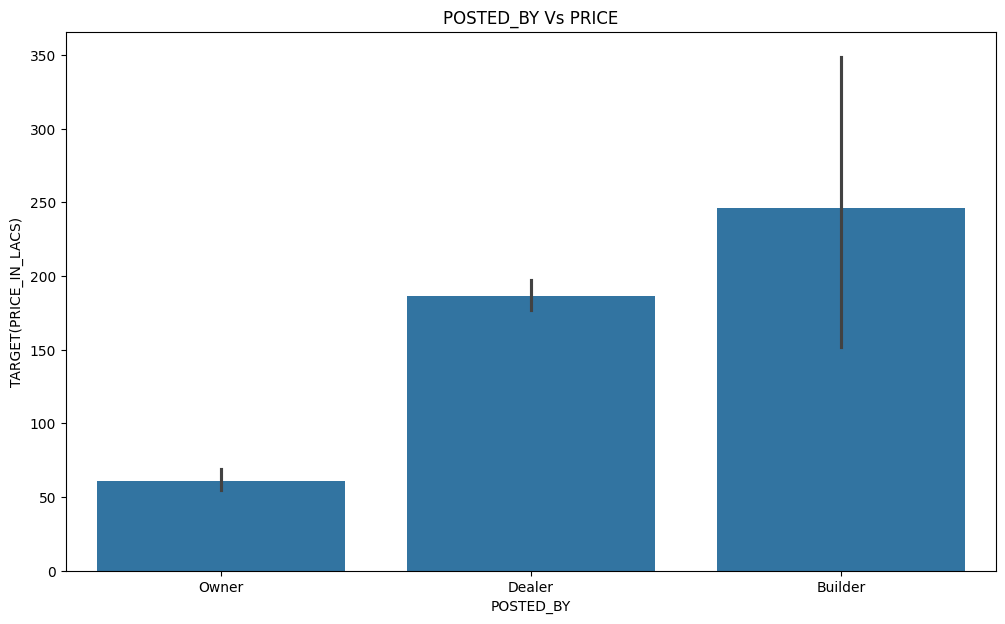

In [ ]:
# plotting posted_by vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['POSTED_BY'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('POSTED_BY Vs PRICE')
plt.show()

The houses posted by Builder gets sold for higher price, followed by dealer

## *BHK_NO. Vs TARGET PRICE*

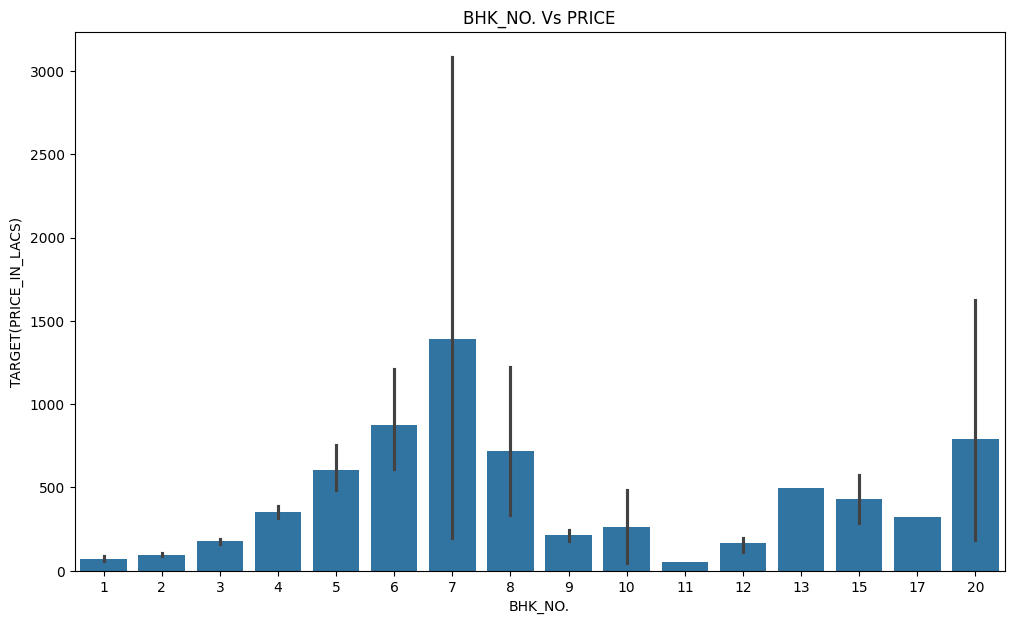

In [ ]:
# plotting BHK_NO vs price
plt.figure(figsize=(12,7))
sns.barplot(x = train_data['BHK_NO.'], y = train_data['TARGET(PRICE_IN_LACS)'])
plt.title('BHK_NO. Vs PRICE')
plt.show()

From this we can see that there is a linear realtion between no.of.bedrooms and price until 7 bhk and then there isnt a precise patters.

## *SQUARE_FT Vs TARGET FEATURE*

<Figure size 1200x700 with 0 Axes>

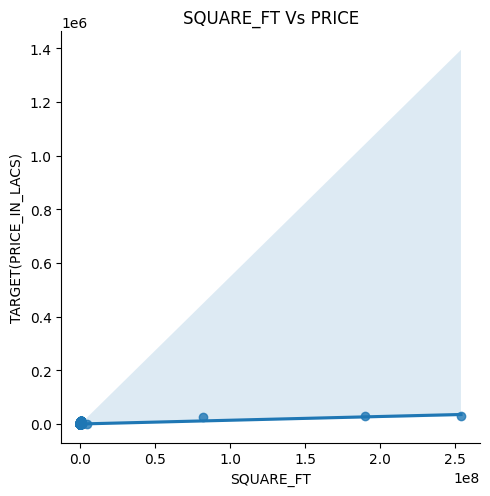

In [ ]:
# plotting Square_feet vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'SQUARE_FT', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('SQUARE_FT Vs PRICE')
plt.show()

From this graph we can clearly understand that the price of house increases with increse in Sq feet.

## *LONGITUDE Vs TARGET PRICE*

<Figure size 1200x700 with 0 Axes>

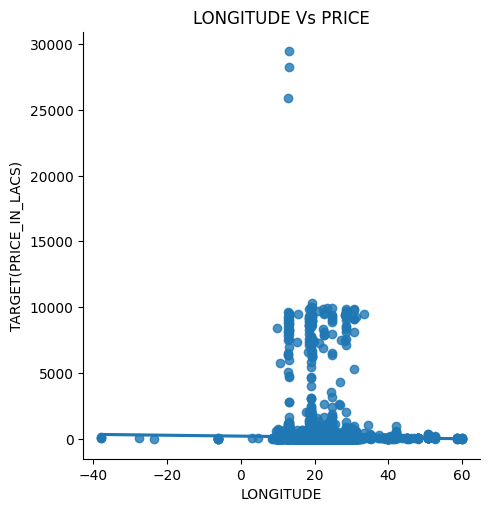

In [ ]:
# plotting longitud vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LONGITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LONGITUDE Vs PRICE')
plt.show()

## *LATITUDE Vs TARET PRICE*

<Figure size 1200x700 with 0 Axes>

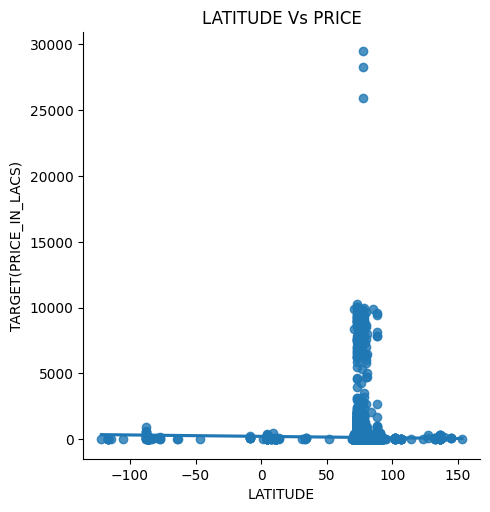

In [ ]:
# plotting latitude vs price
plt.figure(figsize=(12,7))
sns.lmplot(x = 'LATITUDE', y = 'TARGET(PRICE_IN_LACS)', data = train_data)
plt.title('LATITUDE Vs PRICE')
plt.show()

In [ ]:
# dropping longitude and latitude
train_data.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True, errors='ignore')
test_data.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True, errors='ignore')

We can drop longitude and latitude as there is no clear correlation between them and the price.

## **CONVERTING CATEGORICAL DATA TO NUMERICAL VALUES**

In [ ]:
# mapping the categorical data to numerical values
train_data['BHK_OR_RK'] = train_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})
train_data['POSTED_BY'] = train_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})

test_data['POSTED_BY'] = test_data['POSTED_BY'].map({'Owner':1, 'Dealer':2, 'Builder':3})
test_data['BHK_OR_RK'] = test_data['BHK_OR_RK'].map({'BHK':1, 'RK':1})

In [ ]:
test_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,1,0,0,1,1,545.171340,1,1
1,2,1,1,2,1,800.000000,0,0
2,2,0,0,2,1,1257.096513,1,1
3,2,0,0,3,1,1400.329489,1,1
4,1,0,0,1,1,430.477830,1,1


In [ ]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
0,1,0,0,2,1,1311.365124,1,1,54.771845
1,2,0,0,2,1,1275.326592,1,1,50.467525
2,1,0,0,2,1,954.758264,1,1,44.404171
3,1,0,1,2,1,935.702177,1,1,60.110613
4,2,1,0,2,1,998.871424,0,1,60.078084


## **TRAIN VALIDATION SPLIT**

In [ ]:
# spliting features and label

Y = train_data['TARGET(PRICE_IN_LACS)']
train_data.drop(['TARGET(PRICE_IN_LACS)'], axis=1, inplace=True)

In [ ]:
train_data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE
0,1,0,0,2,1,1311.365124,1,1
1,2,0,0,2,1,1275.326592,1,1
2,1,0,0,2,1,954.758264,1,1
3,1,0,1,2,1,935.702177,1,1
4,2,1,0,2,1,998.871424,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = train_data

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)
print('train features shape:', X_train.shape,';','train label shape:', Y_train.shape)
print('validation features shape:', X_val.shape,';','validation label shape:', Y_val.shape)

train features shape: (26505, 8) ; train label shape: (26505,)
validation features shape: (2946, 8) ; validation label shape: (2946,)


## **MODEL SELECTION**

*   Linear Regression
*   Decision Tree
*   Random Forest




## *LINEAR REGRESSION*

In [ ]:
# creating a dictionary to store the score of models
models = dict()

In [ ]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

# fitting the model
lin_reg = LinearRegression()
print(lin_reg)
lin_reg.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", lin_reg.score(X_train,Y_train))
print("Score on validation data:", lin_reg.score(X_val,Y_val))

LinearRegression()
Score on training data: 0.14347154039550314
Score on validation data: 0.504370713675775


In [ ]:
models['lin_reg'] = lin_reg.score(X_val,Y_val)

## *DECISION TREE REGRESSOR*

In [ ]:
# importing DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# fitting the model
tree = DecisionTreeRegressor(max_depth=1)
print(tree)
tree.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", tree.score(X_train,Y_train))
print("Score on validation data:", tree.score(X_val,Y_val))

DecisionTreeRegressor(max_depth=1)
Score on training data: 0.7871764732842783
Score on validation data: 0.5555784725161994


In [ ]:
models['tree'] = tree.score(X_val,Y_val)

## *RANDOM FOREST REGRESSOR*

In [ ]:
# importing DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# fitting the model
forest = RandomForestRegressor(
     n_estimators=500,  # More trees
         max_depth=30,  # Allow deeper trees
             min_samples_leaf=2,  # Allow more flexibility per leaf
                 max_features=None,  # Use all features to prevent randomness reducing performance
                     random_state=42
              )
print(forest)
forest.fit(X_train, Y_train)

# Evaluvating the score of the model
print("Score on training data:", forest.score(X_train,Y_train))
print("Score on validation data:", forest.score(X_val,Y_val))

RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2,
                      n_estimators=500, random_state=42)
Score on training data: 0.9219411160062977
Score on validation data: 0.6876981136735224


In [ ]:
models['forest'] = forest.score(X_val,Y_val)

## **COMPARING PERFORMANCE OF MODELS**

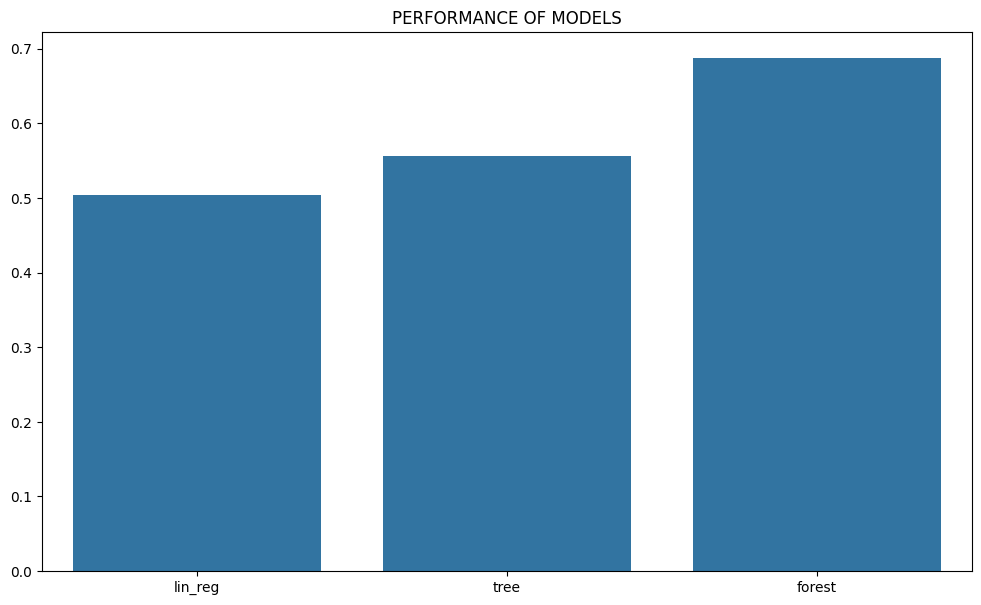

In [ ]:
# plotting the performance of models
plt.figure(figsize=(12,7))
keys = list(models.keys())
values = list(models.values())
sns.barplot(x = keys, y = values)
plt.title('PERFORMANCE OF MODELS')
plt.show()

The score of forest is clearly greater than the other models. So we will use forest to predict the test dataset.

## **PREDICTION ON TEST DATASET**

In [ ]:
# fitting forest to the whole training dataset
forest.fit(train_data, Y)

#prediction on testing dataset
Y_pred = forest.predict(test_data)

In [ ]:
Y_pred = pd.DataFrame(Y_pred, columns=['Predicted Price(in lakhs)'])

In [ ]:
Y_pred.to_csv('prediction.csv', index=False)

In [ ]:
# downloading the predictions.csv file
files.download("prediction.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>